# SIM ADC Input wiht python package

In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import sipm_signals.signals as sgn
%matplotlib inline


def to_hex(x, pos):
    return '0x%x' % int(x)

fmt = ticker.FuncFormatter(to_hex)


plt.rcParams['figure.dpi'] = 100
plt.rcParams['axes.facecolor']='white'
plt.rcParams['figure.facecolor']='white'

plt.rcParams['savefig.facecolor']='white'

## SiPM ADC

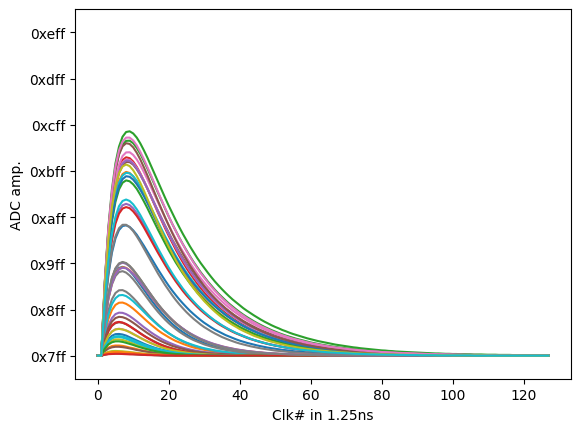

In [2]:
[plt.plot(*sgn.sipm_adc()) for _ in range(50)]

plt.xlabel("Clk# in 1.25ns")
plt.ylabel("ADC amp.")
plt.ylim([2048-128,4096-128])
plt.gca().get_yaxis().set_major_locator(ticker.MultipleLocator(sgn.ADC_MAX/16))
plt.gca().get_yaxis().set_major_formatter(fmt)
plt.gcf().patch.set_alpha(0.0)

## Double SiPM ADC

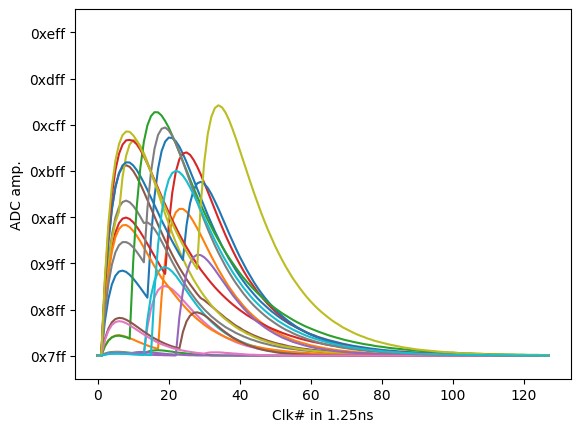

In [3]:
[plt.plot(*sgn.double_sipm_adc()) for _ in range(20)]

plt.xlabel("Clk# in 1.25ns")
plt.ylabel("ADC amp.")
plt.ylim([2048-128,4096-128])
plt.gca().get_yaxis().set_major_locator(ticker.MultipleLocator(sgn.ADC_MAX/16))
plt.gca().get_yaxis().set_major_formatter(fmt)
plt.gcf().patch.set_alpha(0.0)

## Nois ADC

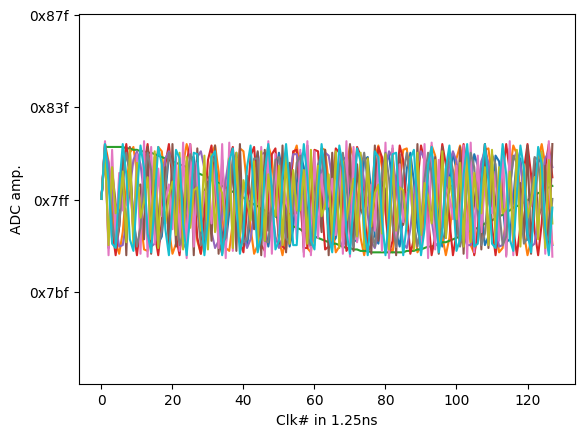

In [4]:
[plt.plot(*sgn.nois_adc()) for _ in range(10)]

plt.xlabel("Clk# in 1.25ns")
plt.ylabel("ADC amp.")
plt.ylim([2048-128,2048+128])
plt.gca().get_yaxis().set_major_locator(ticker.MultipleLocator(sgn.ADC_MAX/64))
plt.gca().get_yaxis().set_major_formatter(fmt)
plt.gcf().patch.set_alpha(0.0)

## uint12 to redint7

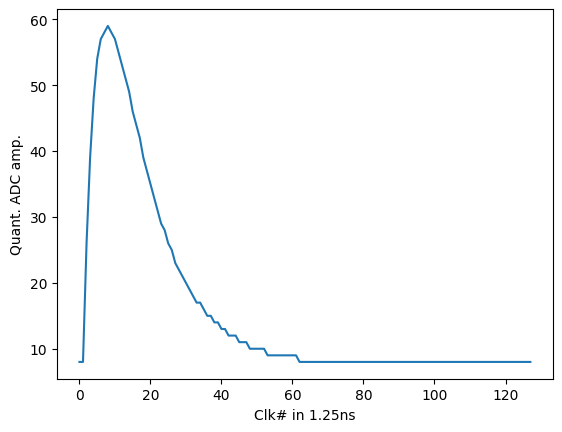

In [5]:
double_sipm_adc = [ sgn.double_sipm_adc() for i in range(20) ]
plt.plot(double_sipm_adc[0][0], sgn.uint12_to_redint(double_sipm_adc[8][1]))

plt.xlabel("Clk# in 1.25ns")
plt.ylabel("Quant. ADC amp.")
# plt.ylim([2048-128,4096-128])
# plt.gca().get_yaxis().set_major_locator(ticker.MultipleLocator(ADC_MAX/16))
# plt.gca().get_yaxis().set_major_formatter(fmt)
plt.gcf().patch.set_alpha(0.0)

## Effect of distill_uniform

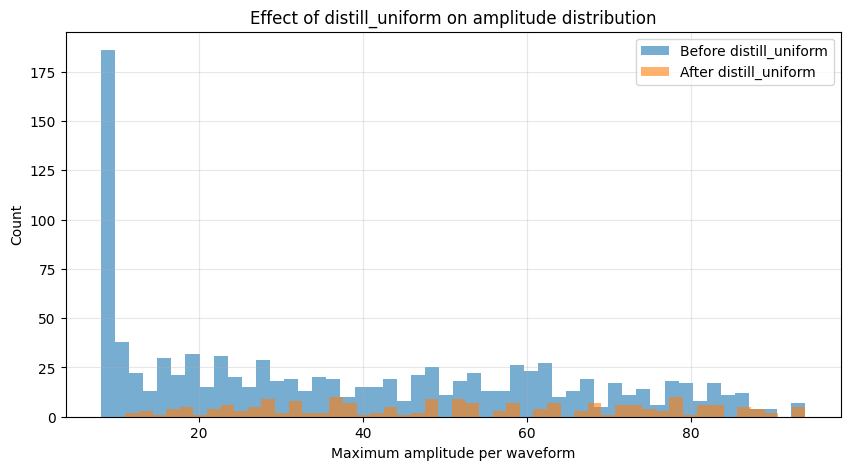

In [6]:
import numpy as np

# Generate a batch of waveforms (like gen_Data does)
num_samples = 1000
raw_data = np.empty((num_samples, sgn.ADC_SAMPLES), dtype=np.uint8)
for i in range(num_samples):
    raw_data[i, :] = sgn.sipm_inp()

# --- compute maxima before uniformization ---
maxima_raw = np.max(raw_data, axis=1)

# --- apply distill_uniform ---
uniform_data = sgn.distill_uniform(raw_data, min_amp=10, sample_size=200)
maxima_uniform = np.max(uniform_data, axis=1)

# --- plot histograms ---
plt.figure(figsize=(10, 5))
plt.hist(maxima_raw, bins=50, alpha=0.6, label='Before distill_uniform')
plt.hist(maxima_uniform, bins=50, alpha=0.6, label='After distill_uniform')
plt.xlabel('Maximum amplitude per waveform')
plt.ylabel('Count')
plt.title('Effect of distill_uniform on amplitude distribution')
plt.legend()
plt.grid(alpha=0.3)
plt.show()
